In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling

from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('taxi.csv')

In [3]:
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [4]:
data.offer_gk.unique().size

100000

In [5]:
data.order_gk.unique().size

81435

In [6]:
data.ride_type_desc.unique()

array(['private', 'business', 'affiliate', 'SMB'], dtype=object)

#### offer_gk - id оффера (заказа)
В датасете 10 000 уникальных записей этого признака

#### weekday_key - ключ дня недели, от 0 до 6

#### hour_key - ключ часа, от 0 до 23

#### driver_gk - id водителя

#### order_gk - id пользователя сделавшего заказ

#### driver_latitude - широта водителя в момент поступления заказа

#### driver_longitude - долгота водителя в момент поступления заказа

#### origin_order_latitude - широта заказа

#### origin_order_longitude - долгота заказа

#### distance_km - дистанция до финальной точки заказа

#### duration_min - время до финальной точки заказа

#### offer_class_group - тип обслуживания заказа (эконом, стандарт и тд)

#### ride_type_desc - тип заказа
 * private - обычная поездка
 * business - поездка оплачиваемая компанией
 * affiliate - поездка обслуживаемая компанией партнером
 * SMB - не уверен, но скорее всего Small and Medium-sized Businesses, похоже на бизнес поездку

#### driver_response - ответ водителя
 * 1 - взял закза
 * 0 - не взял заказ

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


Из info видно, что в датасете нет пропусков. Также видно, что большинство данных числовые, и только два признака категориальные: **offer_class_group** и **ride_type_desc**

In [8]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


Из describe мы видим, что признаки обощначающие день недели и час **weekday_key** и **hour_key**, начинаются с нуля. Соответственно понедельник - это 0 день недели, вторник 2 и тд., а час представлен в 24 часовом формате. 

Наибольший интерес представляют признаки **distance_km** и **duration_min** - дальность и время поездки. Эти признаки непрерывные и напрямую влияют на стоимость поездки (не представлена в датасете) и соответвенно на решение таксиста взять заказ. Видно, что некоторые поля имеют значение -1, что может означать, что длительность поездки не была определена заранее. Также, видно, что максимальное значение расстояния - 5234 км, что наверняка является выбросом, так как это аналагично поездке на другой континент, а максимальное время - 3958 минут или 66 часов, наверняка является выбросом, так как сложно представить, что таксист будет ехать трое суток подряд. Скорее всего данный выброс получился из-за глюка в системе, и программа случайно поставила точку не в то место. Скорее всего из-за этого выброса стандартное отклонение в два раза выше среднего значения для дальности и времени поездки.

В признаках **driver_latitude**, **driver_longitude**, **origin_order_latitude**, **origin_order_longitude** присутствует значение -1, что может означать, что координаты водителя и/или заказа отсутствовали в момент заказа. 

In [9]:
data.profile_report()

Из profiling report мы ещё раз видим, что в датасете отсутствуют пропуски. 

У признаков **distance_km** и **duration_min** очень высокая корреляция - 0.9770. Соответсвенно, при построении модели один из этих признаков можно будет исключить, так как он не добавляет полезной информации датасету.

У признаков **distance_km**, **duration_min**, **driver_latitude**, **driver_longitude**, **origin_order_latitude**, **origin_order_longitude** наблюдается большой перекос в распределении, так как у всех этих признаков есть много полей равных -1, которое отличается от среднего значения распределения.

Признак **offer_class_group** содержит 9 различных категорий. Это довольно много, в случае, если придется использовать onehot encoding, чтобы превратить признак в вид читаемый машиной, но не критично много.

Теперь займемся поиском выбросов.

Предположим, что мы рассматриваем данные для города и его пригродов, а также, что таксист не может ехать больше одного дня. Таким образом мы оставим данные о поездках меньше 1000 км.

In [10]:
data[data.distance_km < 1000].describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,9.998200e+04,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,5.662511e+05,3.159869,13.827709,3446.387850,460860.557570,55.700813,37.492278,55.772442,37.541631,18.011700,22.852619,0.492419
std,3.259382e+05,2.054237,7.306604,2038.718373,266066.720133,2.136095,1.454770,0.666044,0.467799,23.500445,22.631078,0.499945
min,4.000000e+00,0.000000,0.000000,14.000000,18.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.856240e+05,1.000000,8.000000,1421.000000,229181.500000,55.708629,37.413497,55.708002,37.407117,-1.000000,-1.000000,0.000000
50%,5.657415e+05,3.000000,16.000000,3507.000000,462417.500000,55.772914,37.533643,55.772562,37.532528,10.404500,19.700000,0.000000
75%,8.487568e+05,5.000000,20.000000,5242.000000,690894.000000,55.960672,37.624110,55.962006,37.624356,30.632000,37.850000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.000000,56.174097,38.280547,56.311121,38.243608,987.373000,713.317000,1.000000


Датасет уменьшился всего на 18 значений (~0.02%), а среднее отклонение **distance_km** уменьшилось практически в два раза. Теперь максимальное значение расстояния равное 987 км, а время 713 минутам или 12 часам - адекватное время, которое может потратить таксист, чтобы довезти клиента в другой город.

In [64]:
data_clean = data[data.distance_km < 1000]

Теперь уберем из датасета ненужные признаки. Признаки **offer_gk**, **driver_gk** и **order_gk**, id заказа, id водителя и id пользователя не влияют на решение водителя взять заказ, как по смыслу - для водителя важны расстояние до клиента и длительность поездки, так и математически - у них практически 0 корреляция с признаком **driver_response**.

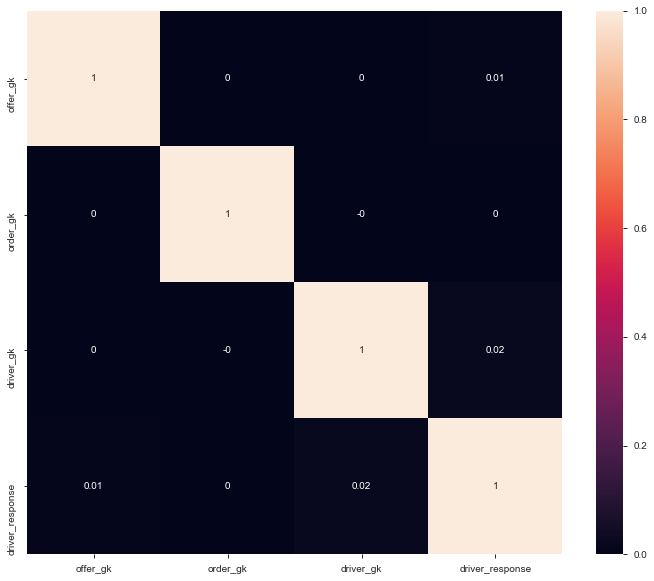

In [65]:
correlation_matrix = data_clean[['offer_gk', 'order_gk', 'driver_gk', 'driver_response']].corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [66]:
data_clean = data_clean.drop(['offer_gk', 'order_gk', 'driver_gk'], axis=1)
data_clean.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


Теперь обратим внимание на **distance_km** и **duration_min**. У этих двух признаков высокая корреляция - 0.96, соответственно нам не нужны оба этих признака для построения модели, так как они оба содержат одинаковую информацию. Поэтому мы удалим признак **duration_min** из датасета.

In [67]:
correlation_matrix = data_clean[['distance_km', 'duration_min']].corr().round(2)
correlation_matrix

,distance_km,duration_min
distance_km,1.00,0.96
duration_min,0.96,1.00


In [68]:
data_clean = data_clean.drop('duration_min', axis=1)
data_clean.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,offer_class_group,ride_type_desc,driver_response
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,Economy,private,0
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,Standard,private,1
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,Economy,private,0
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,Economy,private,1
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,Economy,private,1


Теперь обратим внимание на признаки **driver_latitude**, **driver_longitude**, **origin_order_latitude** и **origin_order_longitude** - координаты водителя и заказа. В текущем формате эти четыре признака не дадут модели практически никакой информации. Однако, можно преобразовать эти четыре признака в один - расстояние между водителем и заказом. Этот признак будет более информативным, так как он будет показывать, сколько водителю нужно потратить времени, чтобы взять закза. 

In [69]:
from math import radians, cos, sin, asin, sqrt 

# Функция преобразовывающая координаты в расстояние в км
def distance(lat1, lon1, lat2, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers.
    r = 6371
       
    # calculate the result 
    return(c * r) 

In [70]:
distance_to_order = []

for i in data_clean.index:
    lat1 = data_clean.loc[i, 'driver_latitude']
    lon1 = data_clean.loc[i, 'driver_longitude']
    lat2 = data_clean.loc[i, 'origin_order_latitude']
    lon2 = data_clean.loc[i, 'origin_order_longitude']
    distance_to_order.append(distance(lat1, lon1, lat2, lon2))

data_clean['distance_to_order'] = distance_to_order

In [71]:
data_clean.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,offer_class_group,ride_type_desc,driver_response,distance_to_order
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,Economy,private,0,1.363045
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,Standard,private,1,3.413092
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,Economy,private,0,0.409999
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,Economy,private,1,0.647472
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,Economy,private,1,1.062481


И теперь можно удалить признаки **driver_latitude**, **driver_longitude**, **origin_order_latitude** и **origin_order_longitude**, так как вся информация, которая в них была теперь содержится в признаке **distance_to_order**.

In [72]:
data_clean = data_clean.drop(['driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude'], axis=1)
data_clean.head()

,weekday_key,hour_key,distance_km,offer_class_group,ride_type_desc,driver_response,distance_to_order
0,5,20,-1.000,Economy,private,0,1.363045
1,5,14,18.802,Standard,private,1,3.413092
2,6,14,6.747,Economy,private,0,0.409999
3,2,6,-1.000,Economy,private,1,0.647472
4,4,16,12.383,Economy,private,1,1.062481


Теперь нужно преоборазовать категориальные **offer_class_group** и **ride_type_desc** признаки в формат приемлемый для модели. Так как мы будем использовать RandomForestClassifier, то необязательно использовать onehot encoding, нужно простро преобразовать **string** в **int**.

In [73]:
def converter(series):
    unique = series.unique().tolist()
    new_series = []
    
    for i in series.index:
        val = unique.index(series.loc[i])
        new_series.append(val)
        
    return new_series

In [79]:
offer_class_group_int = converter(data_clean.offer_class_group)
data_clean['offer_class_group_int'] = offer_class_group_int

ride_type_desc_int = converter(data_clean.ride_type_desc)
data_clean['ride_type_desc_int'] = ride_type_desc_int

In [82]:
data_clean.head()

,weekday_key,hour_key,distance_km,offer_class_group,ride_type_desc,driver_response,distance_to_order,offer_class_group_int,ride_type_desc_int
0,5,20,-1.000,Economy,private,0,1.363045,0,0
1,5,14,18.802,Standard,private,1,3.413092,1,0
2,6,14,6.747,Economy,private,0,0.409999,0,0
3,2,6,-1.000,Economy,private,1,0.647472,0,0
4,4,16,12.383,Economy,private,1,1.062481,0,0


Мы преобразовали признаки **offer_class_group** и **ride_type_desc**, и теперь можно удалить стобцы с текстовыми значениями.

In [83]:
data_clean = data_clean.drop(['offer_class_group', 'ride_type_desc'], axis=1)
data_clean.head()

,weekday_key,hour_key,distance_km,driver_response,distance_to_order,offer_class_group_int,ride_type_desc_int
0,5,20,-1.000,0,1.363045,0,0
1,5,14,18.802,1,3.413092,1,0
2,6,14,6.747,0,0.409999,0,0
3,2,6,-1.000,1,0.647472,0,0
4,4,16,12.383,1,1.062481,0,0


Теперь разделим выборку на обучающую и тестовую и обучим с помощью RandomForestClassifier

In [84]:
from sklearn.model_selection import train_test_split

X = data_clean.drop('driver_response', axis=1)
y = data_clean.driver_response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6881532229834475


Модел дала результат с точностью 69% - это неплохо1 результат, который показывает, что мы верно преоброзовывали метрики и оставили только необходимые признаки, и что их колличество приемлемо.